# Basics

## PyTorch Basics

In [1]:
import torch 

In [2]:
import torchvision

In [3]:
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

In [4]:
# ================================================================== #
#                         Table of Contents                          #
# ================================================================== #

# 1. Basic autograd example 1               (Line 25 to 39)
# 2. Basic autograd example 2               (Line 46 to 83)
# 3. Loading data from numpy                (Line 90 to 97)
# 4. Input pipline                          (Line 104 to 129)
# 5. Input pipline for custom dataset       (Line 136 to 156)
# 6. Pretrained model                       (Line 163 to 176)
# 7. Save and load model                    (Line 183 to 189) 

In [5]:
# ================================================================== #
#                     1. Basic autograd example 1                    #
# ================================================================== #

In [6]:
# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

In [7]:
# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

In [8]:
# Compute gradients.
y.backward()

In [9]:
# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 

tensor(2.)
tensor(1.)
tensor(1.)


In [10]:
# ================================================================== #
#                    2. Basic autograd example 2                     #
# ================================================================== #

In [11]:
# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

In [12]:
# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[ 0.4992,  0.2770,  0.1992],
        [ 0.1647, -0.1774, -0.5663]], requires_grad=True)
b:  Parameter containing:
tensor([ 0.3061, -0.1481], requires_grad=True)


In [13]:
# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

In [14]:
# Forward pass.
pred = linear(x)

In [15]:
# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

loss:  1.0415191650390625


In [16]:
# Backward pass.
loss.backward()

In [17]:
# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

dL/dw:  tensor([[ 0.3719, -0.1274,  0.2646],
        [-0.1529,  0.1879, -0.3598]])
dL/db:  tensor([-0.3903, -0.0911])


In [18]:
# 1-step gradient descent.
optimizer.step()

In [19]:
# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

loss after 1 step optimization:  1.035805344581604


In [20]:
# ================================================================== #
#                     3. Loading data from numpy                     #
# ================================================================== #

In [21]:
# Create a numpy array.
x = np.array([[1, 2], [3, 4]])

# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)

# Convert the torch tensor to a numpy array.
z = y.numpy()

In [22]:
y

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

In [23]:
z

array([[1, 2],
       [3, 4]])

In [24]:
# ================================================================== #
#                         4. Input pipline                           #
# ================================================================== #

# Download and construct CIFAR-10 dataset.
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True, 
                                             transform=transforms.ToTensor(),
                                             download=True)

# Fetch one data pair (read data from disk).
image, label = train_dataset[0]
print (image.size())
print (label)


Files already downloaded and verified
torch.Size([3, 32, 32])
6


In [25]:
# Data loader (this provides queues and threads in a very simple way).
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [26]:
# When iteration starts, queue and thread start to load data from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = data_iter.next()

# Actual usage of the data loader is as below.
for images, labels in train_loader:
    # Training code should be written here.
    pass


In [29]:
# ================================================================== #
#                5. Input pipline for custom dataset                 #
# ================================================================== #

# You should build your custom dataset as below.
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        # TODO
        # 1. Initialize file paths or a list of file names. 
        pass
    def __getitem__(self, index):
        # TODO
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        pass
    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return 0 

# You can then use the prebuilt data loader. 
custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=64, 
                                           shuffle=True)

ValueError: num_samples should be a positive integer value, but got num_samples=0

这里报错是因为没写对应函数内容

In [30]:
# ================================================================== #
#                        6. Pretrained model                         #
# ================================================================== #

# Download and load the pretrained ResNet-18.
resnet = torchvision.models.resnet18(pretrained=True)

# If you want to finetune only the top layer of the model, set as below.
for param in resnet.parameters():
    param.requires_grad = False

# Replace the top layer for finetuning.
resnet.fc = nn.Linear(resnet.fc.in_features, 100)  # 100 is an example.

# Forward pass.
images = torch.randn(64, 3, 224, 224)
outputs = resnet(images)
print (outputs.size())     # (64, 100)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\Mr. Wu/.cache\torch\checkpoints\resnet18-5c106cde.pth
100.0%


torch.Size([64, 100])


In [ ]:
# ================================================================== #
#                      7. Save and load the model                    #
# ================================================================== #

# Save and load the entire model.
torch.save(resnet, 'model.ckpt')
model = torch.load('model.ckpt')

# Save and load only the model parameters (recommended).
torch.save(resnet.state_dict(), 'params.ckpt')
resnet.load_state_dict(torch.load('params.ckpt'))

## Linear Regression

In [31]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

Epoch [5/60], Loss: 4.8994
Epoch [10/60], Loss: 2.1245
Epoch [15/60], Loss: 1.0003
Epoch [20/60], Loss: 0.5447
Epoch [25/60], Loss: 0.3601
Epoch [30/60], Loss: 0.2852
Epoch [35/60], Loss: 0.2547
Epoch [40/60], Loss: 0.2423
Epoch [45/60], Loss: 0.2372
Epoch [50/60], Loss: 0.2350
Epoch [55/60], Loss: 0.2340
Epoch [60/60], Loss: 0.2335


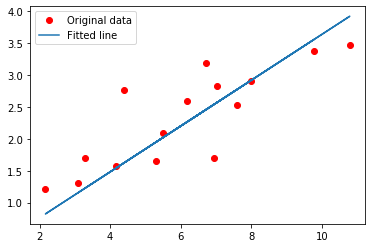

In [33]:
# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

## Logistic Regression

In [34]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [35]:
# Hyper-parameters 
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [36]:
# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

100.1%

Extracting ../../data\MNIST\raw\train-images-idx3-ubyte.gz to ../../data\MNIST\raw


113.5%

Extracting ../../data\MNIST\raw\train-labels-idx1-ubyte.gz to ../../data\MNIST\raw


100.4%

Extracting ../../data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../../data\MNIST\raw


180.4%

Extracting ../../data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../../data\MNIST\raw
Processing...
Done!


In [37]:
# Logistic regression model
model = nn.Linear(input_size, num_classes)

# Loss and optimizer
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')


Epoch [1/5], Step [100/600], Loss: 2.2534
Epoch [1/5], Step [200/600], Loss: 2.1395
Epoch [1/5], Step [300/600], Loss: 2.0485
Epoch [1/5], Step [400/600], Loss: 1.9770
Epoch [1/5], Step [500/600], Loss: 1.8643
Epoch [1/5], Step [600/600], Loss: 1.8293
Epoch [2/5], Step [100/600], Loss: 1.7757
Epoch [2/5], Step [200/600], Loss: 1.6627
Epoch [2/5], Step [300/600], Loss: 1.5991
Epoch [2/5], Step [400/600], Loss: 1.6044
Epoch [2/5], Step [500/600], Loss: 1.4955
Epoch [2/5], Step [600/600], Loss: 1.4027
Epoch [3/5], Step [100/600], Loss: 1.4214
Epoch [3/5], Step [200/600], Loss: 1.4436
Epoch [3/5], Step [300/600], Loss: 1.3576
Epoch [3/5], Step [400/600], Loss: 1.2695
Epoch [3/5], Step [500/600], Loss: 1.2638
Epoch [3/5], Step [600/600], Loss: 1.3191
Epoch [4/5], Step [100/600], Loss: 1.2104
Epoch [4/5], Step [200/600], Loss: 1.1853
Epoch [4/5], Step [300/600], Loss: 1.1690
Epoch [4/5], Step [400/600], Loss: 1.2242
Epoch [4/5], Step [500/600], Loss: 1.2125
Epoch [4/5], Step [600/600], Loss:

## Feedforward Neural Network

In [38]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [39]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [40]:
# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

In [41]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [42]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [43]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [44]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

In [45]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.3070
Epoch [1/5], Step [200/600], Loss: 0.2062
Epoch [1/5], Step [300/600], Loss: 0.2144
Epoch [1/5], Step [400/600], Loss: 0.2050
Epoch [1/5], Step [500/600], Loss: 0.1291
Epoch [1/5], Step [600/600], Loss: 0.0825
Epoch [2/5], Step [100/600], Loss: 0.0569
Epoch [2/5], Step [200/600], Loss: 0.1050
Epoch [2/5], Step [300/600], Loss: 0.0758
Epoch [2/5], Step [400/600], Loss: 0.0716
Epoch [2/5], Step [500/600], Loss: 0.0689
Epoch [2/5], Step [600/600], Loss: 0.1437
Epoch [3/5], Step [100/600], Loss: 0.1478
Epoch [3/5], Step [200/600], Loss: 0.0412
Epoch [3/5], Step [300/600], Loss: 0.0744
Epoch [3/5], Step [400/600], Loss: 0.2049
Epoch [3/5], Step [500/600], Loss: 0.0392
Epoch [3/5], Step [600/600], Loss: 0.0641
Epoch [4/5], Step [100/600], Loss: 0.1016
Epoch [4/5], Step [200/600], Loss: 0.0419
Epoch [4/5], Step [300/600], Loss: 0.0731
Epoch [4/5], Step [400/600], Loss: 0.0556
Epoch [4/5], Step [500/600], Loss: 0.1559
Epoch [4/5], Step [600/600], Loss:

In [53]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 98.02 %


In [47]:
?torch.max

In [48]:
a = torch.randn(1, 3)

In [50]:
a

tensor([[ 0.4084, -0.4905, -1.0438]])

In [51]:
torch.max(a, 1)

torch.return_types.max(
values=tensor([0.4084]),
indices=tensor([0]))

# Intermediate

## Convolutional Neural Network

In [1]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [2]:
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

100.1%

Extracting ../../data/MNIST\raw\train-images-idx3-ubyte.gz to ../../data/MNIST\raw


113.5%

Extracting ../../data/MNIST\raw\train-labels-idx1-ubyte.gz to ../../data/MNIST\raw


100.4%

Extracting ../../data/MNIST\raw\t10k-images-idx3-ubyte.gz to ../../data/MNIST\raw


180.4%

Extracting ../../data/MNIST\raw\t10k-labels-idx1-ubyte.gz to ../../data/MNIST\raw
Processing...
Done!


In [7]:
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

In [8]:
model = ConvNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.1571
Epoch [1/5], Step [200/600], Loss: 0.1239
Epoch [1/5], Step [300/600], Loss: 0.0374
Epoch [1/5], Step [400/600], Loss: 0.1678
Epoch [1/5], Step [500/600], Loss: 0.0613
Epoch [1/5], Step [600/600], Loss: 0.0263
Epoch [2/5], Step [100/600], Loss: 0.0544
Epoch [2/5], Step [200/600], Loss: 0.0051
Epoch [2/5], Step [300/600], Loss: 0.0401
Epoch [2/5], Step [400/600], Loss: 0.0199
Epoch [2/5], Step [500/600], Loss: 0.0122
Epoch [2/5], Step [600/600], Loss: 0.0912
Epoch [3/5], Step [100/600], Loss: 0.0356
Epoch [3/5], Step [200/600], Loss: 0.0495
Epoch [3/5], Step [300/600], Loss: 0.0372
Epoch [3/5], Step [400/600], Loss: 0.0289
Epoch [3/5], Step [500/600], Loss: 0.0090
Epoch [3/5], Step [600/600], Loss: 0.0443
Epoch [4/5], Step [100/600], Loss: 0.0242
Epoch [4/5], Step [200/600], Loss: 0.0831
Epoch [4/5], Step [300/600], Loss: 0.0054
Epoch [4/5], Step [400/600], Loss: 0.0458
Epoch [4/5], Step [500/600], Loss: 0.0062
Epoch [4/5], Step [600/600], Loss:

In [9]:
# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Test Accuracy of the model on the 10000 test images: 98.52 %


## Deep Residual Network

In [10]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [11]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
# Hyper-parameters
num_epochs = 80
learning_rate = 0.001

In [13]:
# Image preprocessing modules
transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor()])

In [14]:
# CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True, 
                                             transform=transform,
                                             download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                            train=False, 
                                            transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=100, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=100, 
                                          shuffle=False)


100.0%

Extracting ../../data/cifar-10-python.tar.gz to ../../data/


In [15]:
# 3x3 convolution
def conv3x3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=3, 
                     stride=stride, padding=1, bias=False)

![img](https://img-blog.csdn.net/20180114184946861?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQvbGFucmFuMg==/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/SouthEast)

In [16]:
# Residual block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(out_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample
        
    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

In [17]:
# ResNet
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 16
        self.conv = conv3x3(3, 16)
        self.bn = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 16, layers[0])
        self.layer2 = self.make_layer(block, 32, layers[1], 2)
        self.layer3 = self.make_layer(block, 64, layers[2], 2)
        self.avg_pool = nn.AvgPool2d(8)
        self.fc = nn.Linear(64, num_classes)
        
    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (self.in_channels != out_channels):
            downsample = nn.Sequential(
                conv3x3(self.in_channels, out_channels, stride=stride),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [18]:
model = ResNet(ResidualBlock, [2, 2, 2]).to(device)

In [19]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# For updating learning rate
def update_lr(optimizer, lr):    
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [20]:
# Train the model
total_step = len(train_loader)
curr_lr = learning_rate
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Decay learning rate
    if (epoch+1) % 20 == 0:
        curr_lr /= 3
        update_lr(optimizer, curr_lr)

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'resnet.ckpt')

Epoch [1/80], Step [100/500] Loss: 1.6555
Epoch [1/80], Step [200/500] Loss: 1.4872
Epoch [1/80], Step [300/500] Loss: 1.1150
Epoch [1/80], Step [400/500] Loss: 1.1670
Epoch [1/80], Step [500/500] Loss: 1.1839
Epoch [2/80], Step [100/500] Loss: 1.2111
Epoch [2/80], Step [200/500] Loss: 1.0577
Epoch [2/80], Step [300/500] Loss: 0.7485
Epoch [2/80], Step [400/500] Loss: 0.8553
Epoch [2/80], Step [500/500] Loss: 0.9321
Epoch [3/80], Step [100/500] Loss: 0.7481
Epoch [3/80], Step [200/500] Loss: 0.8588
Epoch [3/80], Step [300/500] Loss: 0.8780
Epoch [3/80], Step [400/500] Loss: 0.8394
Epoch [3/80], Step [500/500] Loss: 0.7793
Epoch [4/80], Step [100/500] Loss: 0.7854
Epoch [4/80], Step [200/500] Loss: 0.5770
Epoch [4/80], Step [300/500] Loss: 0.6597
Epoch [4/80], Step [400/500] Loss: 0.7649
Epoch [4/80], Step [500/500] Loss: 0.5849
Epoch [5/80], Step [100/500] Loss: 0.6561
Epoch [5/80], Step [200/500] Loss: 0.6855
Epoch [5/80], Step [300/500] Loss: 0.7685
Epoch [5/80], Step [400/500] Loss:

Epoch [39/80], Step [300/500] Loss: 0.1628
Epoch [39/80], Step [400/500] Loss: 0.1706
Epoch [39/80], Step [500/500] Loss: 0.3111
Epoch [40/80], Step [100/500] Loss: 0.1035
Epoch [40/80], Step [200/500] Loss: 0.1804
Epoch [40/80], Step [300/500] Loss: 0.1544
Epoch [40/80], Step [400/500] Loss: 0.3522
Epoch [40/80], Step [500/500] Loss: 0.2950
Epoch [41/80], Step [100/500] Loss: 0.0638
Epoch [41/80], Step [200/500] Loss: 0.1534
Epoch [41/80], Step [300/500] Loss: 0.1772
Epoch [41/80], Step [400/500] Loss: 0.1736
Epoch [41/80], Step [500/500] Loss: 0.1437
Epoch [42/80], Step [100/500] Loss: 0.1880
Epoch [42/80], Step [200/500] Loss: 0.1524
Epoch [42/80], Step [300/500] Loss: 0.2974
Epoch [42/80], Step [400/500] Loss: 0.1315
Epoch [42/80], Step [500/500] Loss: 0.0559
Epoch [43/80], Step [100/500] Loss: 0.2105
Epoch [43/80], Step [200/500] Loss: 0.2430
Epoch [43/80], Step [300/500] Loss: 0.1791
Epoch [43/80], Step [400/500] Loss: 0.2350
Epoch [43/80], Step [500/500] Loss: 0.0928
Epoch [44/8

Epoch [77/80], Step [400/500] Loss: 0.0951
Epoch [77/80], Step [500/500] Loss: 0.1643
Epoch [78/80], Step [100/500] Loss: 0.0649
Epoch [78/80], Step [200/500] Loss: 0.1923
Epoch [78/80], Step [300/500] Loss: 0.1686
Epoch [78/80], Step [400/500] Loss: 0.1224
Epoch [78/80], Step [500/500] Loss: 0.1005
Epoch [79/80], Step [100/500] Loss: 0.0854
Epoch [79/80], Step [200/500] Loss: 0.1197
Epoch [79/80], Step [300/500] Loss: 0.0792
Epoch [79/80], Step [400/500] Loss: 0.1397
Epoch [79/80], Step [500/500] Loss: 0.2007
Epoch [80/80], Step [100/500] Loss: 0.1588
Epoch [80/80], Step [200/500] Loss: 0.1662
Epoch [80/80], Step [300/500] Loss: 0.0812
Epoch [80/80], Step [400/500] Loss: 0.1035
Epoch [80/80], Step [500/500] Loss: 0.0897
Accuracy of the model on the test images: 88.26 %


## Recurrent Neural Network

In [21]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [22]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
sequence_length = 28
input_size = 28
hidden_size = 128
num_layers = 2
num_classes = 10
batch_size = 100
num_epochs = 2
learning_rate = 0.01

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

In [29]:
# Recurrent neural network (many-to-one)
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # Set initial hidden and cell states 
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

In [30]:
model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)

In [31]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total)) 

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/2], Step [100/600], Loss: 0.4873
Epoch [1/2], Step [200/600], Loss: 0.3824
Epoch [1/2], Step [300/600], Loss: 0.1849
Epoch [1/2], Step [400/600], Loss: 0.1911
Epoch [1/2], Step [500/600], Loss: 0.1688
Epoch [1/2], Step [600/600], Loss: 0.0288
Epoch [2/2], Step [100/600], Loss: 0.1916
Epoch [2/2], Step [200/600], Loss: 0.0843
Epoch [2/2], Step [300/600], Loss: 0.0589
Epoch [2/2], Step [400/600], Loss: 0.0433
Epoch [2/2], Step [500/600], Loss: 0.0688
Epoch [2/2], Step [600/600], Loss: 0.0979
Test Accuracy of the model on the 10000 test images: 97.89 %


## Bidirectional Recurrent Neural Network## 

In [1]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# Hyper-parameters
sequence_length = 28
input_size = 28
hidden_size = 128
num_layers = 2
num_classes = 10
batch_size = 100
num_epochs = 2
learning_rate = 0.003

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

In [4]:
# Bidirectional recurrent neural network (many-to-one)
class BiRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(BiRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size*2, num_classes)  # 2 for bidirection
    
    def forward(self, x):
        # Set initial states
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) # 2 for bidirection 
        c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size*2)
        
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

In [5]:
model = BiRNN(input_size, hidden_size, num_layers, num_classes).to(device)

In [6]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total)) 

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/2], Step [100/600], Loss: 0.6560
Epoch [1/2], Step [200/600], Loss: 0.1316
Epoch [1/2], Step [300/600], Loss: 0.2301
Epoch [1/2], Step [400/600], Loss: 0.1411
Epoch [1/2], Step [500/600], Loss: 0.0342
Epoch [1/2], Step [600/600], Loss: 0.1780
Epoch [2/2], Step [100/600], Loss: 0.0519
Epoch [2/2], Step [200/600], Loss: 0.0886
Epoch [2/2], Step [300/600], Loss: 0.1098
Epoch [2/2], Step [400/600], Loss: 0.1470
Epoch [2/2], Step [500/600], Loss: 0.0553
Epoch [2/2], Step [600/600], Loss: 0.0819
Test Accuracy of the model on the 10000 test images: 97.81 %


## Language Model (RNN-LM)

In [8]:
import torch
import os

In [9]:
class Dictionary(object):
    def __init__(self):
        self.word2idx = {}
        self.idx2word = {}
        self.idx = 0
    
    def add_word(self, word):
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            self.idx += 1
    
    def __len__(self):
        return len(self.word2idx)

In [10]:
class Corpus(object):
    def __init__(self):
        self.dictionary = Dictionary()

    def get_data(self, path, batch_size=20):
        # Add words to the dictionary
        with open(path, 'r') as f:
            tokens = 0
            for line in f:
                words = line.split() + ['<eos>']
                tokens += len(words)
                for word in words: 
                    self.dictionary.add_word(word)  
        
        # Tokenize the file content
        ids = torch.LongTensor(tokens)
        token = 0
        with open(path, 'r') as f:
            for line in f:
                words = line.split() + ['<eos>']
                for word in words:
                    ids[token] = self.dictionary.word2idx[word]
                    token += 1
        num_batches = ids.size(0) // batch_size
        ids = ids[:num_batches*batch_size]
        return ids.view(batch_size, -1)

In [11]:
import torch
import torch.nn as nn
import numpy as np
from torch.nn.utils import clip_grad_norm_

In [12]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [13]:
# Hyper-parameters
embed_size = 128
hidden_size = 1024
num_layers = 1
num_epochs = 5
num_samples = 1000     # number of words to be sampled
batch_size = 20
seq_length = 30
learning_rate = 0.002

In [14]:
# Load "Penn Treebank" dataset
corpus = Corpus()
ids = corpus.get_data('train.txt', batch_size)
vocab_size = len(corpus.dictionary)
num_batches = ids.size(1) // seq_length

In [17]:
# RNN based language model
class RNNLM(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers):
        super(RNNLM, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, vocab_size)
        
    def forward(self, x, h):
        # Embed word ids to vectors
        x = self.embed(x)
        
        # Forward propagate LSTM
        out, (h, c) = self.lstm(x, h)
        
        # Reshape output to (batch_size*sequence_length, hidden_size)
        out = out.reshape(out.size(0)*out.size(1), out.size(2))
        
        # Decode hidden states of all time steps
        out = self.linear(out)
        return out, (h, c)

In [19]:
model = RNNLM(vocab_size, embed_size, hidden_size, num_layers).to(device)

In [20]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Truncated backpropagation
def detach(states):
    return [state.detach() for state in states] 

In [21]:
# Train the model
for epoch in range(num_epochs):
    # Set initial hidden and cell states
    states = (torch.zeros(num_layers, batch_size, hidden_size).to(device),
              torch.zeros(num_layers, batch_size, hidden_size).to(device))
    
    for i in range(0, ids.size(1) - seq_length, seq_length):
        # Get mini-batch inputs and targets
        inputs = ids[:, i:i+seq_length].to(device)
        targets = ids[:, (i+1):(i+1)+seq_length].to(device)
        
        # Forward pass
        states = detach(states)
        outputs, states = model(inputs, states)
        loss = criterion(outputs, targets.reshape(-1))
        
        # Backward and optimize
        model.zero_grad()
        loss.backward()
        clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

        step = (i+1) // seq_length
        if step % 100 == 0:
            print ('Epoch [{}/{}], Step[{}/{}], Loss: {:.4f}, Perplexity: {:5.2f}'
                   .format(epoch+1, num_epochs, step, num_batches, loss.item(), np.exp(loss.item())))

Epoch [1/5], Step[0/1549], Loss: 9.2128, Perplexity: 10025.02
Epoch [1/5], Step[100/1549], Loss: 5.9897, Perplexity: 399.29
Epoch [1/5], Step[200/1549], Loss: 5.9422, Perplexity: 380.78
Epoch [1/5], Step[300/1549], Loss: 5.7781, Perplexity: 323.16
Epoch [1/5], Step[400/1549], Loss: 5.7080, Perplexity: 301.27
Epoch [1/5], Step[500/1549], Loss: 5.1303, Perplexity: 169.07
Epoch [1/5], Step[600/1549], Loss: 5.1780, Perplexity: 177.34
Epoch [1/5], Step[700/1549], Loss: 5.3648, Perplexity: 213.74
Epoch [1/5], Step[800/1549], Loss: 5.1656, Perplexity: 175.15
Epoch [1/5], Step[900/1549], Loss: 5.0731, Perplexity: 159.67
Epoch [1/5], Step[1000/1549], Loss: 5.1105, Perplexity: 165.75
Epoch [1/5], Step[1100/1549], Loss: 5.3461, Perplexity: 209.78
Epoch [1/5], Step[1200/1549], Loss: 5.1456, Perplexity: 171.67
Epoch [1/5], Step[1300/1549], Loss: 5.1091, Perplexity: 165.53
Epoch [1/5], Step[1400/1549], Loss: 4.8377, Perplexity: 126.18
Epoch [1/5], Step[1500/1549], Loss: 5.1470, Perplexity: 171.92
Ep

In [22]:
# Test the model
with torch.no_grad():
    with open('sample.txt', 'w') as f:
        # Set intial hidden ane cell states
        state = (torch.zeros(num_layers, 1, hidden_size).to(device),
                 torch.zeros(num_layers, 1, hidden_size).to(device))

        # Select one word id randomly
        prob = torch.ones(vocab_size)
        input = torch.multinomial(prob, num_samples=1).unsqueeze(1).to(device)

        for i in range(num_samples):
            # Forward propagate RNN 
            output, state = model(input, state)

            # Sample a word id
            prob = output.exp()
            word_id = torch.multinomial(prob, num_samples=1).item()

            # Fill input with sampled word id for the next time step
            input.fill_(word_id)

            # File write
            word = corpus.dictionary.idx2word[word_id]
            word = '\n' if word == '<eos>' else word + ' '
            f.write(word)

            if (i+1) % 100 == 0:
                print('Sampled [{}/{}] words and save to {}'.format(i+1, num_samples, 'sample.txt'))

# Save the model checkpoints
torch.save(model.state_dict(), 'model.ckpt')

Sampled [100/1000] words and save to sample.txt
Sampled [200/1000] words and save to sample.txt
Sampled [300/1000] words and save to sample.txt
Sampled [400/1000] words and save to sample.txt
Sampled [500/1000] words and save to sample.txt
Sampled [600/1000] words and save to sample.txt
Sampled [700/1000] words and save to sample.txt
Sampled [800/1000] words and save to sample.txt
Sampled [900/1000] words and save to sample.txt
Sampled [1000/1000] words and save to sample.txt
